In [1]:
import numpy as np
import pandas as pd
import scipy
import sklearn
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
imdb = pd.read_csv('amazon_cells_labelled.txt', delimiter ='\t', header=None)
imdb.columns = ['message', 'sentiment']

In [3]:
imdb.head()

,message,sentiment
0,So there is no way for me to plug it in here i...,0
1,"Good case, Excellent value.",1
2,Great for the jawbone.,1
3,Tied to charger for conversations lasting more...,0
4,The mic is great.,1


In [4]:
#group data by sentiment to show how much is positive and how much is negative
imdb.groupby('sentiment').agg(['count', 'size', 'nunique']).stack()

message
sentiment                 
0         count        500
          size         500
          nunique      497
1         count        500
          size         500
          nunique      493

In [5]:
#Our dataset is pretty large, let's create a keyword dictionary that will help us build predictive variables
keywords = ['Good', 'Great', 'Poor', 'Not', 'No', 'Best', 'Excellent', 'Disappoint','Waste','Problem']

for key in keywords:
#We are adding spaces around each key word so that we can get the word and not matching on patterns. 
    imdb[str(key)] = imdb.message.str.contains(
        ' ' + str(key) + ' ',
        case=False
    )

In [6]:
#Let's use the Python code to determine whether the given string has at least one character.  We will also determine if that character is 
#either uppercase or not.  If it is upper case then the .isupper() code will return True.  Otherwise, it will return False.

imdb['allcaps'] = imdb.message.str.isupper()


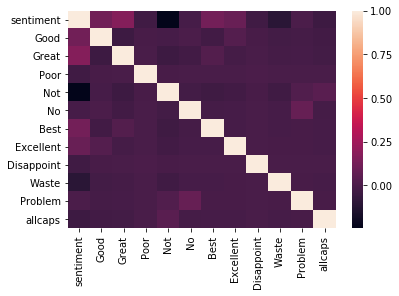

In [7]:
#How much collinearity exists with our data?  Let's use a heatmap.
sns.heatmap(imdb.corr())

In [8]:
data = imdb[keywords + ['allcaps']]
target = imdb['sentiment']

In [9]:
#Our data is binary, so we can use the Bernoulli classifier.

from sklearn.naive_bayes import BernoulliNB

BND = BernoulliNB()

BND.fit(data, target)

y_pred = BND.predict(data)

#We have implemented our model, classified it, fit it, and stored it.  Let's display our results now.
print("Number of incorrect points out a total {} points : {}".format(
    data.shape[0],
    (target != y_pred).sum()))
    
#We can now calculate our accuracy.
print("Percentage accuracy {}".format((data.shape[0] - (target != y_pred).sum()) / data.shape[0]))

Number of incorrect points out a total 1000 points : 410
Percentage accuracy 0.59


In [10]:
#Time to test our model

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(data, target, test_size=0.4, random_state=20)
print('Testing Set: ' + str(BND.fit(X_train, y_train).score(X_test, y_test)))
print('Trainting set: ' + str(BND.fit(data, target).score(data, target)))

Testing Set: 0.56
Trainting set: 0.59


In [11]:
from sklearn.model_selection import cross_val_score
cross_val_score(BND, data, target, cv=10)

array([0.6 , 0.61, 0.61, 0.59, 0.59, 0.52, 0.61, 0.57, 0.6 , 0.55])

Cross validation scores look pretty good.  They are pretty close to the same area and the numbers do not seem to be all over the place.

### Final Thoughts:

Do any of your classifiers seem to overfit?

No, the results seem pretty consistent.  The closeness of the training against the testing size, as well as the closeness of the results in the cross validation scores seem to indicate that overfitting is not occuring.

Which seem to perform the best? Why?

My testing against the training and test set seems to have performed the best.  The results of the cross validation scores are pretty close to each other as well.

Which features seemed to be most impactful to performance?
Adding in more feature keywords, would allow me to make more relevant models.  The selections I have chosen do not bring in everything so the results are not representative of the full data set.

